# Analysis for figure 1

## Imports & Installations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../..'))

import analysis.utils as utils
import configuration.consts as consts

## Analyse cells speed & actin behavior

load actin intensity & speed data, calculatedby Imaris

In [2]:
actin_df = pd.read_csv(consts.storage_path + "data/211212_s3_Results_actin_h_bigfileds.csv")
speed_df = pd.read_excel(consts.storage_path + "data/211212erki-p38-stiching_s3_tdTom_ORG-2_Speed - Copy.xlsx")

In [3]:
def plot_mean_value(ylabel, data):
    plt.plot(data["hour"], data["Mean"])
    p_std = np.asarray(data["Mean"]) + np.asarray(data["StdDev"])
    m_std = np.asarray(data["Mean"]) - np.asarray(data["StdDev"])
    plt.fill_between(data["hour"], m_std, p_std, alpha=0.4)
    plt.xlabel("time")
    plt.ylabel(ylabel)
    plt.savefig(consts.storage_path + f"eps_figs/mean {ylabel} over time.eps", format="eps")
    plt.show()

Plot mean + std of mean actin intensity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


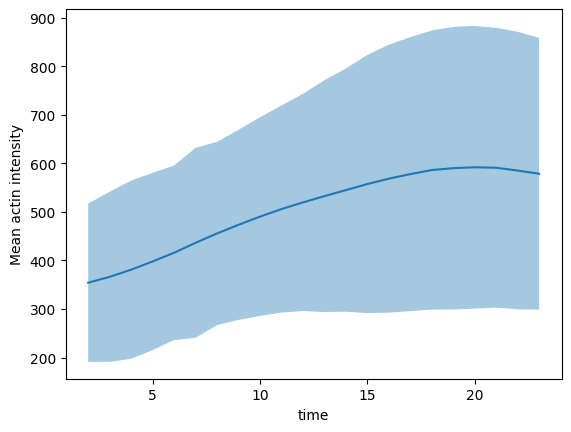

In [4]:
  plot_mean_value("Mean actin intensity", actin_df)

Plot mean + std of single cells' speed

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


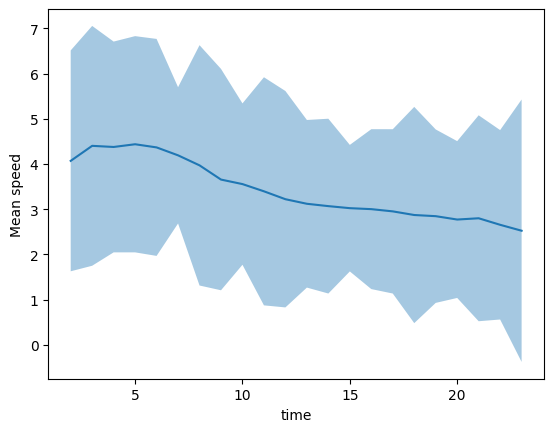

In [5]:
# change columns names & calculate speed std
speed_df["hour"] = speed_df["hours post treatment"]
speed_df["Mean"] = speed_df["average speed (µm/s)"]
speed_df["StdDev"] = speed_df.drop(columns=["time", "hours post treatment", "average speed (µm/s)", "hour", "Mean"]).apply(lambda x: x.std(), axis=1)

plot_mean_value("Mean speed", speed_df)